# Visualization of Bulk RNA-seq

In this part, we will introduce the tutorial of special plot of `omicverse`.

In [1]:
import omicverse as ov
import scanpy as sc
import matplotlib.pyplot as plt
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


## Venn plot

In transcriptome analyses, we often have to study differential genes that are common to different groups. Here, we provide `ov.pl.venn` to draw venn plots to visualise differential genes.

**Function**: `ov.pl.venn`: 
- sets: Subgroups requiring venn plots, Dictionary format, keys no more than 4
- palette: You can also re-specify the colour bar that needs to be drawn, just set `palette=['#FFFFFF','#000000']`, we have prepared `ov.pl.red_color`,`ov.pl.blue_color`,`ov.pl.green_color`,`ov.pl.orange_color`, by default.
- fontsize: the fontsize and linewidth to visualize, fontsize will be multiplied by 2

Text(0, -100, 'gene1,gene2')

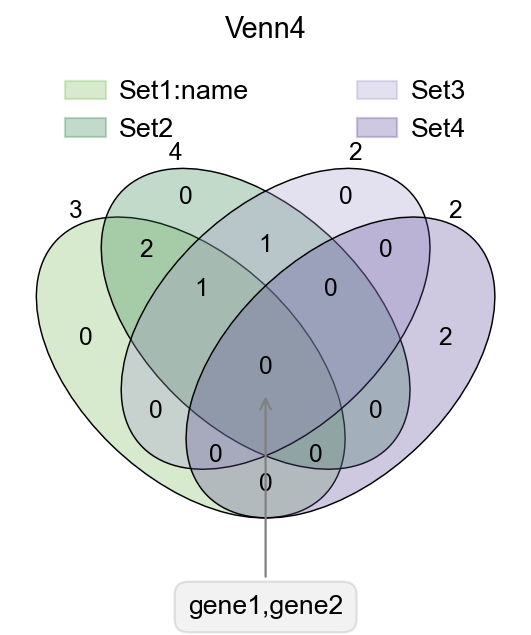

In [20]:
fig,ax=plt.subplots(figsize = (4,4))
#dict of sets
sets = {
    'Set1:name': {1,2,3},
    'Set2': {1,2,3,4},
    'Set3': {3,4},
    'Set4': {5,6}
}
#plot venn   
ov.pl.venn(sets=sets,palette=ov.pl.sc_color,
           fontsize=5.5,ax=ax,
           )


#If we need to annotate genes, we can use plt.annotate for this purpose, 
#we need to modify the text content, xy and xytext parameters.
plt.annotate('gene1,gene2', xy=(50,30), xytext=(0,-100),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', color='gray'),size=12)

#Set the title
plt.title('Venn4',fontsize=13)

#save figure
fig.savefig("figures/bulk_venn4.png",dpi=300,bbox_inches = 'tight')

Text(0.5, 1.0, 'Venn3')

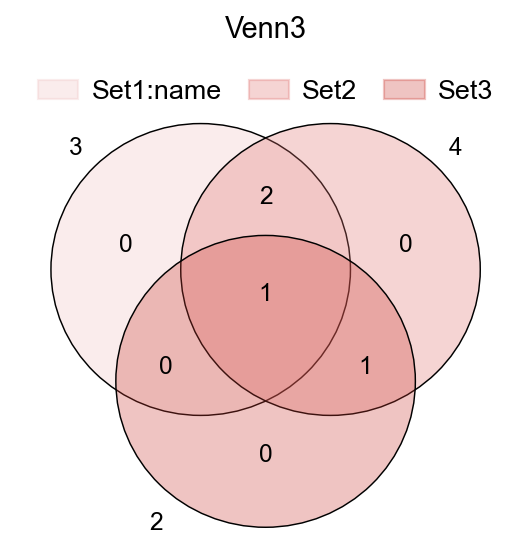

In [9]:
fig,ax=plt.subplots(figsize = (4,4))
#dict of sets
sets = {
    'Set1:name': {1,2,3},
    'Set2': {1,2,3,4},
    'Set3': {3,4},
}
    
ov.pl.venn(sets=sets,ax=ax,fontsize=5.5,
           palette=ov.pl.red_color)

plt.title('Venn3',fontsize=13)

## Volcano plot

For differentially expressed genes, we tend to visualise them only with volcano plots. Here, we present a method for mapping volcanoes using Python `ov.pl.volcano`.

**Function**: `ov.pl.venn`: 

main argument
- result: the DEGs result
- pval_name: the names of the columns whose vertical coordinates need to be plotted, stored in result.columns. In Bulk RNA-seq experiments, we usually set this to qvalue.
- fc_name: The names of the columns for which you need to plot the horizontal coordinates, stored in result.columns. In Bulk RNA-seq experiments, we typically set this to log2FC.
- fc_max: We need to set the threshold for the difference foldchange
- fc_min: We need to set the threshold for the difference foldchange
- pval_threshold: We need to set the threshold for the qvalue
- pval_max: We also need to set boundary values so that the data is not too large to affect the visualisation
- FC_max: We also need to set boundary values so that the data is not too large to affect the visualisation

plot argument
- figsize: The size of the generated figure, by default (4,4).
- title: The title of the plot, by default ''.
- titlefont: A dictionary of font properties for the plot title, by default {'weight':'normal','size':14,}.
- up_color: The color of the up-regulated genes in the plot, by default '#e25d5d'.
- down_color: The color of the down-regulated genes in the plot, by default '#7388c1'.
- normal_color: The color of the non-significant genes in the plot, by default '#d7d7d7'.
- legend_bbox: A tuple containing the coordinates of the legend's bounding box, by default (0.8, -0.2).
- legend_ncol: The number of columns in the legend, by default 2.
- legend_fontsize: The font size of the legend, by default 12.
- plot_genes: A list of genes to be plotted on the volcano plot, by default None.
- plot_genes_num: The number of genes to be plotted on the volcano plot, by default 10.
- plot_genes_fontsize: The font size of the genes to be plotted on the volcano plot, by default 10.
- ticks_fontsize: The font size of the ticks, by default 12.

In [3]:
result=ov.read('data/dds_result.csv',index_col=0)
result.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,qvalue,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),sig
4931428F04Rik,44.747673,-0.592738,0.680476,-0.871063,0.383720,0.650810,0.650810,0.415986,0.186545,44.747673,5.515626,-0.592738,0.592738,normal
Fam135a,1679.272500,0.065358,0.269188,0.242797,0.808163,0.922122,0.922122,0.092501,0.035211,1679.272500,10.714479,0.065358,0.065358,normal
Cxcl5,18.194110,0.391243,0.954836,0.409749,0.681990,0.859639,0.859639,0.166222,0.065684,18.194110,4.262592,0.391243,0.391243,normal
Gm2830,85.257000,0.960027,0.363169,2.643472,0.008206,0.047828,0.047828,2.085866,1.320314,85.257000,6.430570,0.960027,0.960027,normal
Stat2,821.361600,-0.409115,0.448145,-0.912907,0.361292,0.630416,0.630416,0.442142,0.200373,821.361600,9.683629,-0.409115,0.409115,normal


<AxesSubplot: title={'center': 'DEGs in Bulk'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

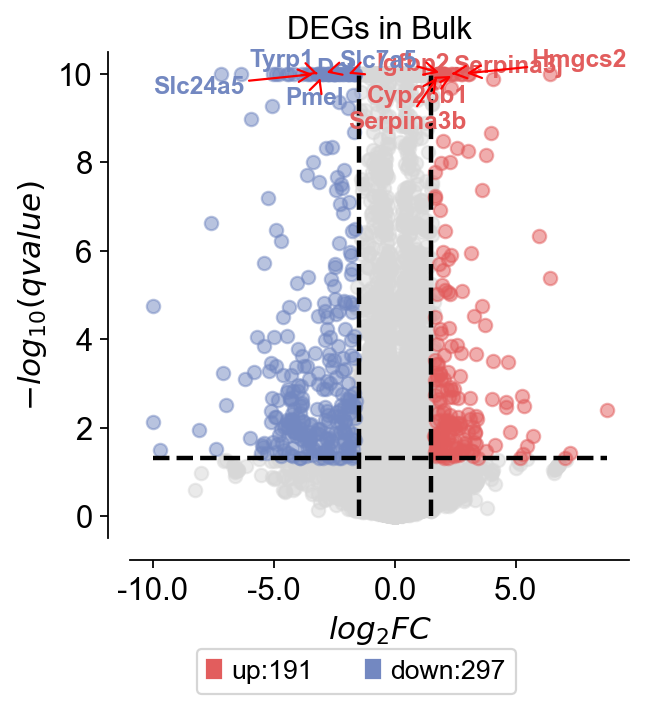

In [4]:
ov.pl.volcano(result,pval_name='qvalue',fc_name='log2FoldChange',
                     pval_threshold=0.05,fc_max=1.5,fc_min=-1.5,
                      pval_max=10,FC_max=10,
                    figsize=(4,4),title='DEGs in Bulk',titlefont={'weight':'normal','size':14,},
                     up_color='#e25d5d',down_color='#7388c1',normal_color='#d7d7d7',
                     up_fontcolor='#e25d5d',down_fontcolor='#7388c1',normal_fontcolor='#d7d7d7',
                     legend_bbox=(0.8, -0.2),legend_ncol=2,legend_fontsize=12,
                     plot_genes=None,plot_genes_num=10,plot_genes_fontsize=11,
                     ticks_fontsize=12,)

## Box plot

For differentially expressed genes in different groups, we sometimes need to compare the differences between different groups, and this is when we need to use box-and-line plots to do the comparison

**Function**: `ov.pl.boxplot`: 

- data: the data to visualize the boxplt example could be found in `seaborn.load_dataset("tips")`
- x_value, y_value, hue: Inputs for plotting long-form data. See examples for interpretation.
- figsize: The size of the generated figure, by default (4,4).
- fontsize: The font size of the tick and labels, by default 12.
- title: The title of the plot, by default ''.


**Function**: `ov.pl.add_palue`: 
- ax: the axes of bardotplot
- line_x1: The left side of the p-value line to be plotted
- line_x2: The right side of the p-value line to be plotted|
- line_y: The height of the p-value line to be plotted
- text_y: How much above the p-value line is plotted text
- text: the text of p-value, you can set `***` to instead `p<0.001`
- fontsize: the fontsize of text
- fontcolor: the color of text
- horizontalalignment: the location of text

In [3]:
import seaborn as sns
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


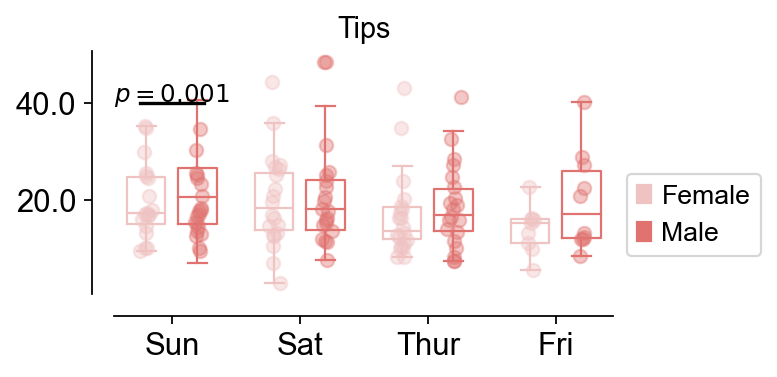

In [7]:
fig,ax=ov.pl.boxplot(data,hue='sex',x_value='day',y_value='total_bill',
              palette=ov.pl.red_color,
              figsize=(4,2),fontsize=12,title='Tips',)

ov.pl.add_palue(ax,line_x1=-0.5,line_x2=0.5,line_y=40,
          text_y=0.2,
          text='$p={}$'.format(round(0.001,3)),
          fontsize=11,fontcolor='#000000',
          horizontalalignment='center',)